In [ ]:
import pandas as pd
nlfdataset = '/content/NFLX.csv'
df = pd.read_csv(nlfdataset)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-01,353.859985,365.390015,349.910004,361.989990,361.989990,8005200
1,2023-02-02,365.160004,368.320007,358.429993,366.890015,366.890015,7857000
2,2023-02-03,359.079987,379.429993,359.000000,365.899994,365.899994,9402000
3,2023-02-06,363.640015,368.450012,360.679993,361.480011,361.480011,4994900
4,2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400


plotting adjusted close price against the Date

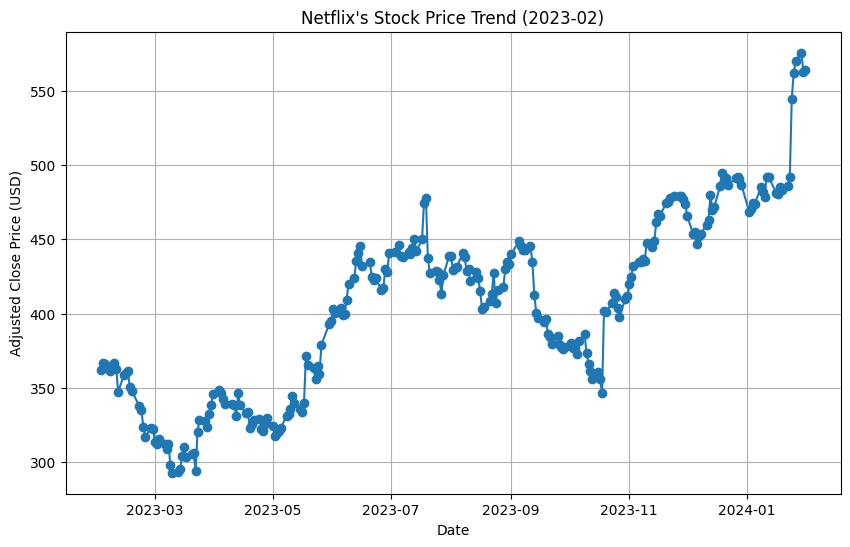

In [ ]:
netflix_data = pd.DataFrame(df)
netflix_data['Date'] = pd.to_datetime(netflix_data['Date'])

plt.figure(figsize=(10, 6))
plt.plot(netflix_data['Date'], netflix_data['Adj Close'], marker='o', linestyle='-')
plt.title("Netflix's Stock Price Trend (2023-02)")
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.grid(True)
plt.show()

In [ ]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
!pip install mpl_finance

Lets draw a candle stick diagram to understand the stock performance through out the year

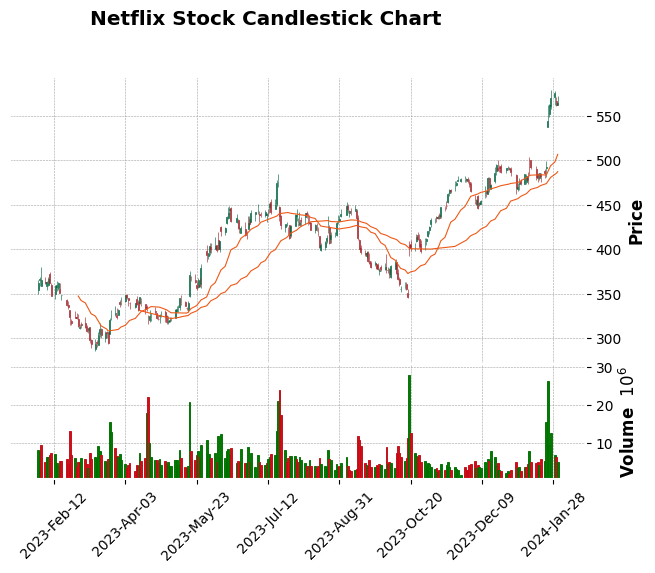

In [ ]:
import pandas as pd
import mplfinance as mpf

df['Date'] = pd.to_datetime(df['Date'])

mpf.plot(df.set_index('Date'), type='candle', style='charles',
         title='Netflix Stock Candlestick Chart',
         ylabel='Price',
         volume=True, mav=(20, 50), show_nontrading=True)


Volatile period is a period where maximum volume amount of trading happens comparing with the threshold value

In [ ]:
df['PriceChange'] = df['High'] - df['Low']
mean_price_change = df['PriceChange'].mean()
std_price_change = df['PriceChange'].std()
threshold = mean_price_change + std_price_change
volatile_periods = df[df['PriceChange'] > threshold]
print(volatile_periods)

          Date        Open        High         Low       Close   Adj Close  \
0   2023-02-01  353.859985  365.390015  349.910004  361.989990  361.989990   
2   2023-02-03  359.079987  379.429993  359.000000  365.899994  365.899994   
8   2023-02-13  349.500000  359.700012  344.250000  358.570007  358.570007   
15  2023-02-23  331.230011  331.279999  314.299988  323.649994  323.649994   
25  2023-03-09  312.079987  312.510010  294.880005  297.779999  297.779999   
35  2023-03-23  304.679993  322.779999  304.140015  320.369995  320.369995   
74  2023-05-18  347.250000  375.869995  346.369995  371.290009  371.290009   
80  2023-05-26  361.100006  383.760010  356.000000  378.880005  378.880005   
81  2023-05-30  397.480011  405.109985  385.790009  392.980011  392.980011   
87  2023-06-07  410.429993  418.950012  399.230011  399.769989  399.769989   
94  2023-06-16  446.149994  447.510010  430.899994  431.959991  431.959991   
99  2023-06-26  422.440002  430.959991  414.899994  415.940002  

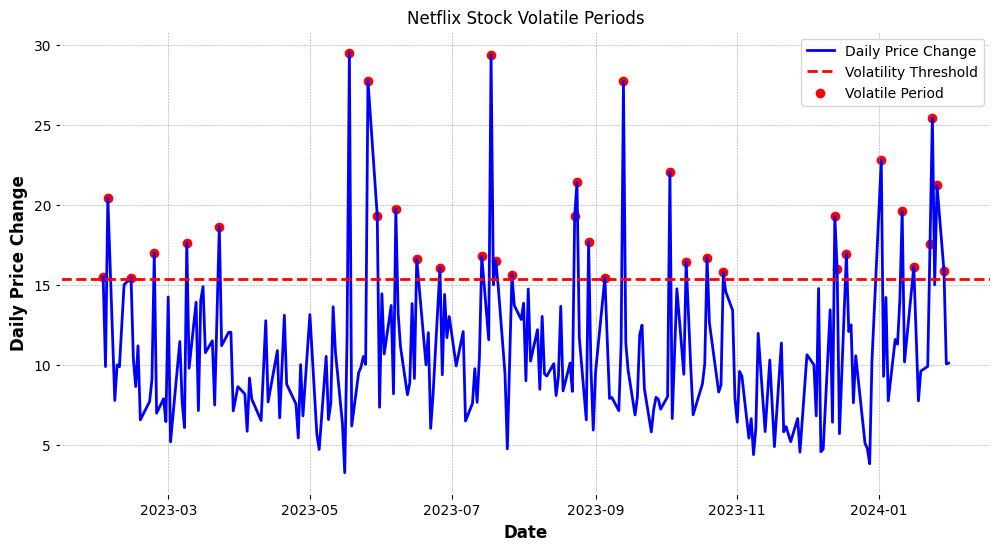

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['PriceChange'] = df['High'] - df['Low']
mean_price_change = df['PriceChange'].mean()
std_price_change = df['PriceChange'].std()
threshold = mean_price_change + std_price_change
volatile_periods = df[df['PriceChange'] > threshold]
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['PriceChange'], label='Daily Price Change', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Volatility Threshold')
plt.scatter(volatile_periods['Date'], volatile_periods['PriceChange'], color='red', label='Volatile Period')
plt.title('Netflix Stock Volatile Periods')
plt.xlabel('Date')
plt.ylabel('Daily Price Change')
plt.legend()
plt.show()


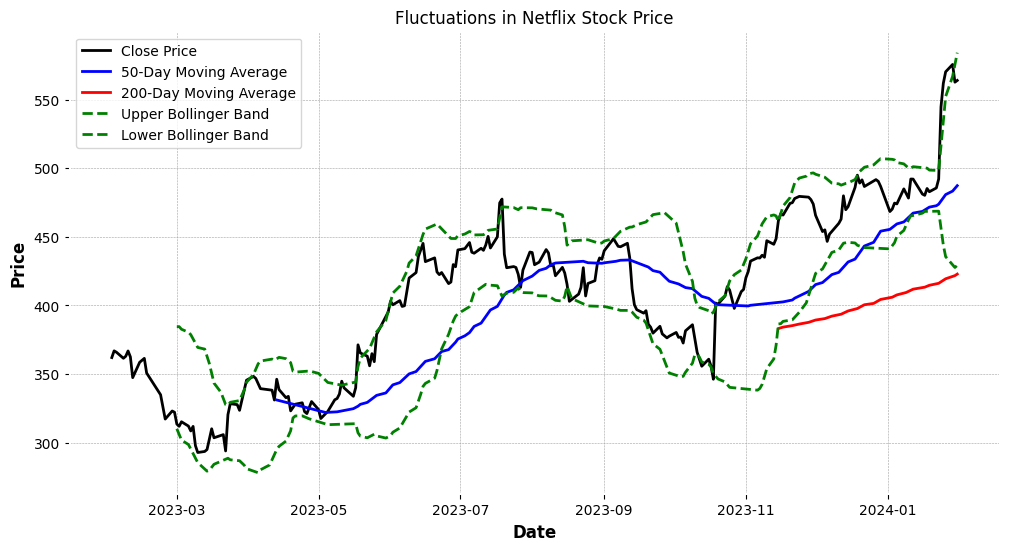

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
df['50MA'] = df['Close'].rolling(window=50).mean()
df['200MA'] = df['Close'].rolling(window=200).mean()
window = 20
df['MA'] = df['Close'].rolling(window=window).mean()
df['STD'] = df['Close'].rolling(window=window).std()
df['Upper_band'] = df['MA'] + (df['STD'] * 2)
df['Lower_band'] = df['MA'] - (df['STD'] * 2)
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='black')
plt.plot(df['Date'], df['50MA'], label='50-Day Moving Average', color='blue')
plt.plot(df['Date'], df['200MA'], label='200-Day Moving Average', color='red')
plt.plot(df['Date'], df['Upper_band'], label='Upper Bollinger Band', color='green', linestyle='--')
plt.plot(df['Date'], df['Lower_band'], label='Lower Bollinger Band', color='green', linestyle='--')
plt.title('Fluctuations in Netflix Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
df['CloseChange'] = df['Close'].pct_change() * 100
max_growth_periods = df.loc[df['CloseChange'] == df['CloseChange'].max()]
print(max_growth_periods)

          Date       Open        High        Low       Close   Adj Close  \
180 2023-10-19  404.73999  408.950012  392.26001  401.769989  401.769989   

       Volume  PriceChange      50MA  200MA          MA        STD  \
180  28074400    16.690002  401.1114    NaN  373.503499  12.730334   

     Upper_band  Lower_band  CloseChange  
180  398.964167  348.042831    16.054764  


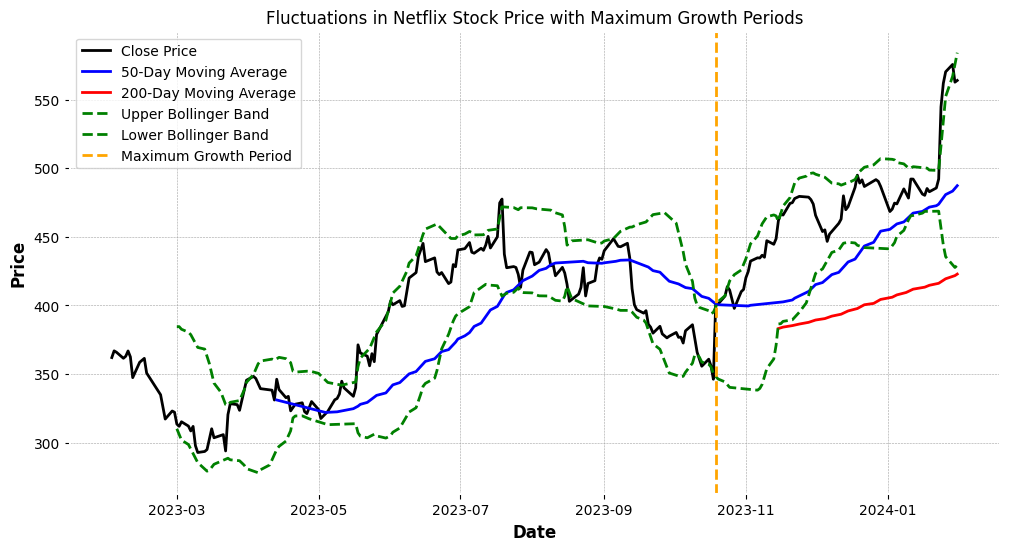

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='black')
plt.plot(df['Date'], df['50MA'], label='50-Day Moving Average', color='blue')
plt.plot(df['Date'], df['200MA'], label='200-Day Moving Average', color='red')
plt.plot(df['Date'], df['Upper_band'], label='Upper Bollinger Band', color='green', linestyle='--')
plt.plot(df['Date'], df['Lower_band'], label='Lower Bollinger Band', color='green', linestyle='--')
for date in max_growth_periods['Date']:
    plt.axvline(x=date, color='orange', linestyle='--', label='Maximum Growth Period')
plt.title('Fluctuations in Netflix Stock Price with Maximum Growth Periods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
df['CloseChange'] = df['Close'].pct_change() * 100
max_loss_periods = df.loc[df['CloseChange'] == df['CloseChange'].min()]
print(max_loss_periods)

          Date   Open   High    Low       Close   Adj Close    Volume  \
116 2023-07-20  447.0  448.5  432.0  437.420013  437.420013  23989700   

     PriceChange      50MA  200MA          MA        STD  Upper_band  \
116         16.5  407.6284    NaN  440.024496  15.915204  471.854905   

     Lower_band  CloseChange  
116  408.194088    -8.410977  


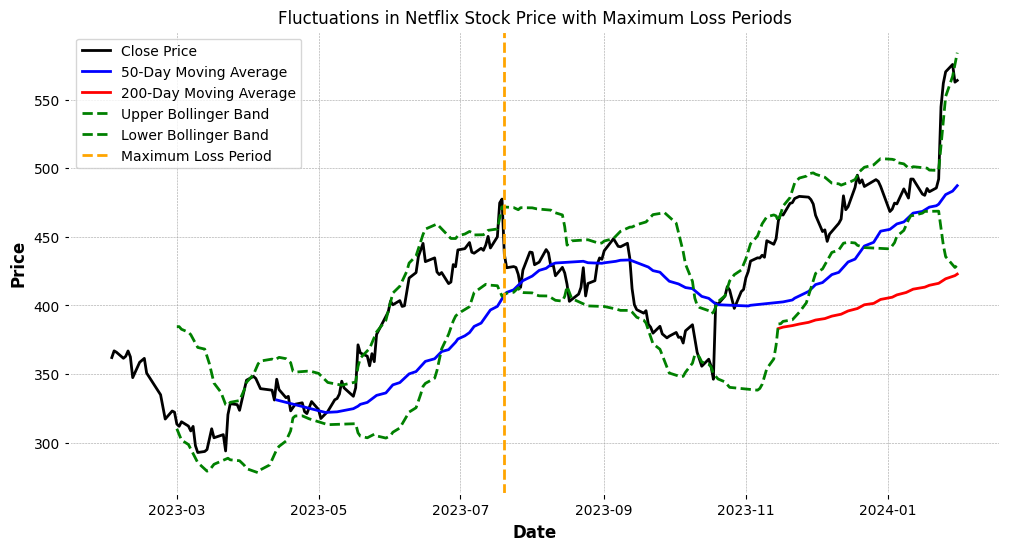

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['CloseChange'] = df['Close'].pct_change() * 100
max_loss_periods = df.loc[df['CloseChange'] == df['CloseChange'].min()]
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='black')
plt.plot(df['Date'], df['50MA'], label='50-Day Moving Average', color='blue')
plt.plot(df['Date'], df['200MA'], label='200-Day Moving Average', color='red')
plt.plot(df['Date'], df['Upper_band'], label='Upper Bollinger Band', color='green', linestyle='--')
plt.plot(df['Date'], df['Lower_band'], label='Lower Bollinger Band', color='green', linestyle='--')
for date in max_loss_periods['Date']:
    plt.axvline(x=date, color='orange', linestyle='--', label='Maximum Loss Period')
plt.title('Fluctuations in Netflix Stock Price with Maximum Loss Periods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Streaming pioneer Netflix, opens new tab showed resilience by gaining more quarterly subscribers than in the past three years despite strikes by Hollywood's writers and actors, sending its shares up 16.23% on 19th october 2023.

reason :  adding that paid-sharing has opened up a bigger-than-expected market of potential subscribers for Netflix.

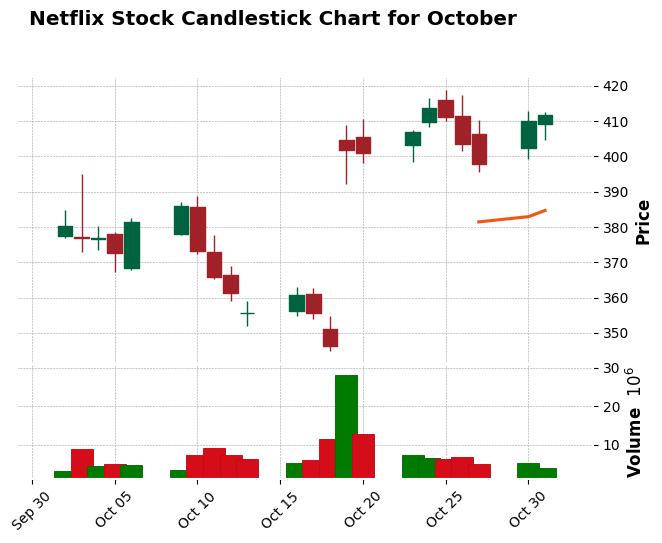

In [ ]:
import pandas as pd
import mplfinance as mpf
df['Date'] = pd.to_datetime(df['Date'])
october_data = df[df['Date'].dt.month == 10]
mpf.plot(october_data.set_index('Date'), type='candle', style='charles',
         title='Netflix Stock Candlestick Chart for October',
         ylabel='Price',
         volume=True, mav=(20, 50), show_nontrading=True)


Shares of Netflix, opens new tab tumbled more than 8% on july 20 2023 after the video-streaming pioneer's lackluster revenue rise sparked concerns of a longer road to growth from its new initiatives.

reason : The company has been fighting off rivals Disney+ and Amazon's Prime Video in an industry that is showing signs of saturation in the United States. Many of the company's new sign-ups are in countries where it charges lower prices.

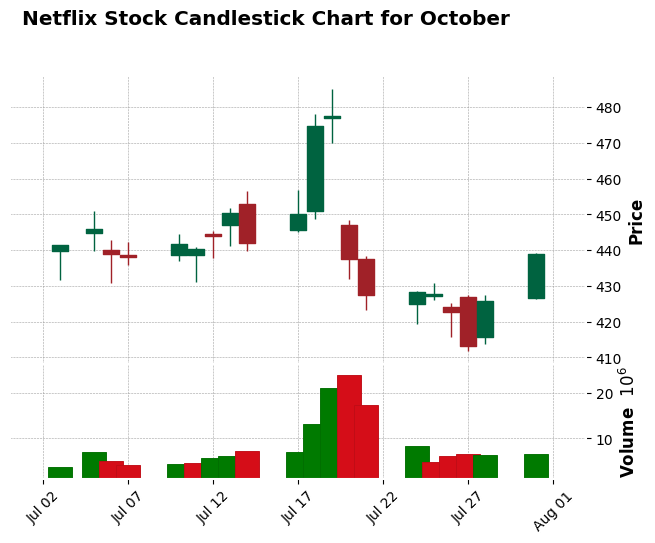

In [ ]:
import pandas as pd
import mplfinance as mpf
df['Date'] = pd.to_datetime(df['Date'])
october_data = df[df['Date'].dt.month == 7]
mpf.plot(october_data.set_index('Date'), type='candle', style='charles',
         title='Netflix Stock Candlestick Chart for October',
         ylabel='Price',
         volume=True, mav=(20, 50), show_nontrading=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


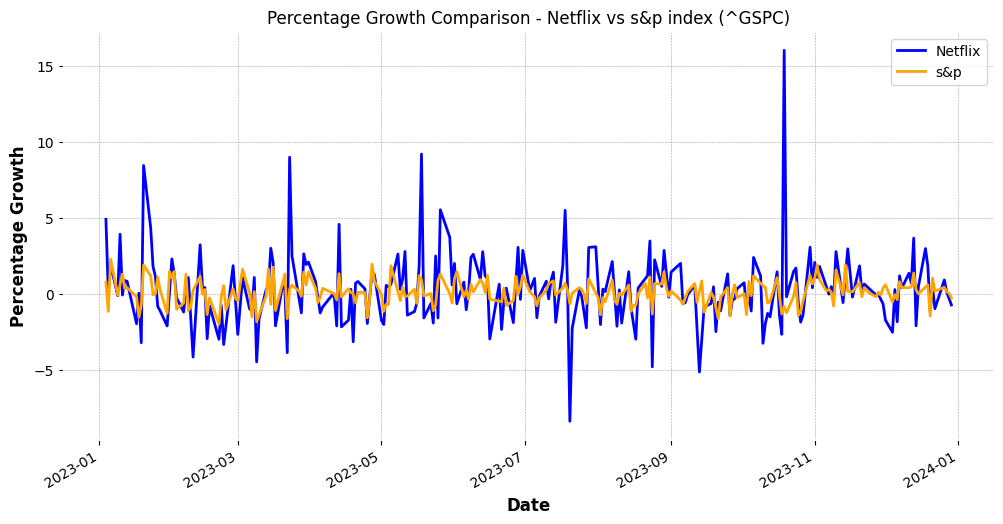

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

netflix_ticker = 'NFLX'
index_ticker = '^GSPC'
netflix_data = yf.download(netflix_ticker, start='2023-01-01', end='2024-01-01')['Close']
index_data = yf.download(index_ticker, start='2023-01-01', end='2024-01-01')['Close']
netflix_growth = netflix_data.pct_change() * 100
index_growth = index_data.pct_change() * 100
plt.figure(figsize=(12, 6))
netflix_growth.plot(label='Netflix', color='blue')
index_growth.plot(label='s&p', color='orange')
plt.title(f"Percentage Growth Comparison - Netflix vs s&p index ({index_ticker})")
plt.xlabel("Date")
plt.ylabel("Percentage Growth")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
data = {'Numerical_Column': [10, 15, 20, 25, 30]}
df = pd.DataFrame(data)
sum_value = df['Numerical_Column'].sum()
mean_value = df['Numerical_Column'].mean()
median_value = df['Numerical_Column'].median()
std_value = df['Numerical_Column'].std()

print("Sum:", sum_value)
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_value)

Sum: 100
Mean: 20.0
Median: 20.0
Standard Deviation: 7.905694150420948


In [ ]:
import pandas as pd
df1 = pd.DataFrame({'ID': [1, 2, 3, 4],
                    'Name': ['sushant', 'akhil', 'vasu', 'ramesh']})

df2 = pd.DataFrame({'ID': [1, 2, 5],
                    'Age': [25, 30, 35]})
merged_df = pd.merge(df1, df2, on='ID', how='inner')

print(merged_df)


   ID     Name  Age
0   1  sushant   25
1   2    akhil   30
